In [1]:
df <- read.csv('output/fill/accuracy_fish_aucs.csv', sep=',')
df <- merge(aggregate(auc ~ var, df, mean), aggregate(auc ~ var, df, sd), by='var')
colnames(df) <- c('FISH', 'AUC (avg)', 'AUC (std)')
df

FISH,AUC (avg),AUC (std)
11p15,0.9475637,0.020463768
13q14,0.9609834,0.025798222
13q34,0.9440841,0.035974141
15q15,0.9766010,0.022007266
17p13,0.8931778,0.068679158
19q13,0.9631221,0.025206826
1q21,0.8953984,0.044996224
20q13,0.8337149,0.111324571
21q22,0.9444748,0.044383231
3q21,0.9492659,0.038169217


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


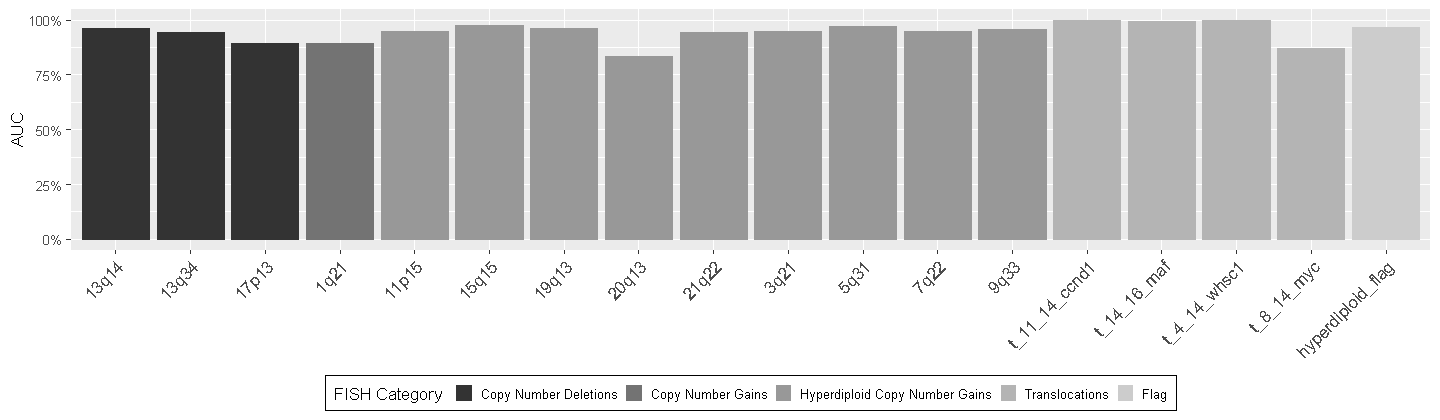

In [31]:
library(ggplot2)

df.base <- read.csv('output/fill/accuracy_fish_aucs.csv', sep=',')
df <- aggregate(auc ~ var, df.base, mean)

df <- df[match(unique(df.base$var), df$var),]

df$category <- c(rep('Copy Number Deletions', 3), c('Copy Number Gains'), 
                 rep('Hyperdiploid Copy Number Gains', 9), rep('Translocations', 4), c('Flag'))

fish.levels <- c("Copy Number Deletions", "Copy Number Gains", 
                 "Hyperdiploid Copy Number Gains", "Translocations", "Flag")
df$category <- factor(df$category, levels = fish.levels)

df <- df[order(df$category),]

df$var <- factor(df$var, levels = df$var[order(df$category)])

p <- ggplot(df, 
                aes(x = var, 
                    y = auc, 
                    colour = category,
                    fill = category)) + 
  geom_bar(stat = "identity", alpha = .6, size = 0.3) +
  ylim(0,1) + 
  scale_fill_hue(name    = 'FISH Category', 
                 labels  = fish.levels) +
  scale_colour_hue(guide = "none") +
  scale_y_continuous(labels = scales::percent) +
  xlab(NULL) + ylab("AUC") +
  theme(legend.background     = element_rect(colour = "black", size = .2),
        panel.grid.major.y    = element_line(size = .15),
        text                  = element_text(size = 10),
        legend.key.size       = unit(10, "pt"),
        legend.position       = 'bottom',
        axis.text.x           = element_text(size = 10, angle=45, hjust=1),
        axis.title.x          = element_text(vjust = 1),
        plot.background       = element_rect(fill = "transparent", color = NA), # bg of the plot
        legend.box.background = element_rect(fill = "transparent"), # get rid of legend panel bg
        legend.key            = element_rect(fill = "transparent", colour = NA) # get rid of key legend fill, and of the surrounding
       )

options(repr.plot.width=12, repr.plot.height=3.5)

ggsave('images/fish_auc.pdf', p, units='cm', heigh=8, width=26, bg="transparent")

p

In [ ]:
df <- read.table('output/result_10_fold.csv', header=T, sep=',')[c('fold', 'n_genes', 'auc_valid', 'tp', 'fp', 'tn', 'fn')]
df <- merge(df, aggregate(auc_valid ~ fold, df, max), on=c('auc_valid', 'fold'))
df <- df[!duplicated(df$fold),]
df
aaa <- rbind(data.frame(fold=df$fold, value=df$auc_valid, k='AUC'), 
             data.frame(fold=df$fold, value=df$n_genes, k='Number of Gene Expressions'))
# aaa <- data.frame(fold=df$fold, value=df$n_genes, k='Number of Gene Expressions')


p <- ggplot(aaa) + geom_bar(aes(as.factor(fold), value), alpha = .6, color='black', stat='identity') + 
    xlab('Fold') + ylab('Value') + facet_wrap(. ~ k, scales='free') + ylab(NULL) +
    theme(
        plot.background = element_rect(fill = "transparent", color = NA), # bg of the plot
        legend.box.background = element_rect(fill = "transparent"), # get rid of legend panel bg
        legend.key = element_rect(fill = "transparent", colour = NA) # get rid of key legend fill, and of the surrounding
    )

ggsave('images/auc_valid_x_number_of_gene_expressions_per_fold.pdf', p, units='cm', heigh=6, width=16, bg="transparent")

options(repr.plot.width=6, repr.plot.height=2)
p

In [ ]:
c(mean(df$auc_valid), sd(df$auc_valid))

In [ ]:
library(ggplot2)
library(repr)

df <- read.table('output/result_10_fold.csv', sep=',', header=T)

p <- ggplot(df, aes(n_genes, auc_valid)) + 
    # geom_bar(stat='identity') + 
    geom_line(size=.1) + geom_point(size=.8) +
    facet_wrap(. ~ paste('Fold #', ifelse(fold < 10, paste('0', fold, sep=''), fold), sep=''), ncol=5) +
    xlab('Number of Gene Expressions') + ylab('AUC') +
    theme(
        plot.background = element_rect(fill = "transparent", color = NA), # bg of the plot
        legend.box.background = element_rect(fill = "transparent"), # get rid of legend panel bg
        legend.key = element_rect(fill = "transparent", colour = NA) # get rid of key legend fill, and of the surrounding
    )

ggsave('images/auc_10_fold_per_n_genes.png', p, units='cm', heigh=8, width=24)

options(repr.plot.width=10, repr.plot.height=3)
p

In [ ]:
library(ggplot2)
library(dplyr)
library(MESS)

df <- read.csv('output/inference_train_10_fold.csv', sep=',')
colnames(df)[5] <- 'n_genes' 

df.limit <- read.csv('output/result_10_fold.csv', sep=',')
df.limit <- df.limit[c('fold', 'n_genes', 'y_train_hat_min', 'y_train_hat_max')]

df <- merge(df, df.limit, on=c('fold', 'n_genes'))

df$y_hat <- (df$y_hat - df$y_train_hat_min) / (df$y_train_hat_max - df$y_train_hat_min)

simple_roc <- function(labels, scores){
  labels <- labels[order(scores, decreasing=TRUE)]
  list(data.frame(TPR=cumsum(labels)/sum(labels), FPR=cumsum(!labels)/sum(!labels), labels))
}

p <- 
  ggplot(df, aes(y_hat, y_true - y_hat)) + geom_point(aes(colour=as.factor(y_true))) + ylim(-1, 1) + 
  geom_hline(yintercept = 0, lty=2,col="grey") + xlab('Predicted Values') + ylab('Residuals') + 
  geom_smooth() + theme(legend.position = 'bottom') + 
  scale_colour_discrete(name = "Risk", labels=c('High', 'Low')) +
  theme(text=element_text(size=11, family='serif'), legend.direction = "horizontal") +
  facet_grid(n_genes ~ fold) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black")) +
  scale_x_continuous(breaks=c(.5)) + scale_y_continuous(breaks=c(0)) 

ggsave('images/residuals.pdf', p, units='cm', heigh=28, width=18)

options(repr.plot.width=9, repr.plot.height=9)

p

In [ ]:
library(ggplot2)
library(dplyr)
library(MESS)
library(ggpubr)

df <- read.csv('output/inference_train_10_fold.csv', sep=',')
colnames(df)[5] <- 'n_genes' 

df.limit <- read.csv('output/result_10_fold.csv', sep=',')
df.limit <- df.limit[c('fold', 'n_genes', 'y_train_hat_min', 'y_train_hat_max')]

df <- merge(df, df.limit, on=c('fold', 'n_genes'))

df <- merge(df, read.csv('output/best_result_per_10_fold.csv', sep=','), on=c('fold', 'n_genes'))[colnames(df)]

df$y_hat <- (df$y_hat - df$y_train_hat_min) / (df$y_train_hat_max - df$y_train_hat_min)

df$fold <- paste('Fold #', df$fold, sep='')
df$fold <- factor(df$fold, levels = unique(df$fold[order(as.numeric(gsub('Fold #', '', df$fold)))]))

simple_roc <- function(labels, scores){
  labels <- labels[order(scores, decreasing=TRUE)]
  list(data.frame(TPR=cumsum(labels)/sum(labels), FPR=cumsum(!labels)/sum(!labels), labels))
}

p <- 
  ggplot(df, aes(y_hat, y_true - y_hat)) + geom_point(aes(colour=as.factor(y_true))) + ylim(-1, 1) + 
  geom_hline(yintercept = 0, lty=2,col="grey") + xlab('Predicted Values') + ylab('Residuals') + 
  geom_smooth() + theme(legend.position = 'bottom') + 
  scale_colour_discrete(name = "Risk", labels=c('High', 'Low')) +
  theme(text=element_text(size=11, family='serif'), 
        legend.direction = "horizontal", 
        axis.text.x=element_text(angle=35)) +
  facet_wrap(. ~ fold, ncol=5) +
  scale_x_continuous(breaks=c(0, .25, .5, .75, 1)) + scale_y_continuous(breaks=c(-1, 0, 1)) +
  stat_cor(label.y = -.9, size=2)

ggsave('images/residuals_best_results_per_fold.png', p, units='cm', heigh=8, width=18)

options(repr.plot.width=6, repr.plot.height=3)

p

In [ ]:
result <- 
  df %>%
    group_by(fold) %>%
    summarize(roc = simple_roc(y_true, y_hat))

final_df = data.frame()

for (i in result$roc) {
  
  i['INDEX'] = 1:nrow(i)
  
  final_df <- rbind(final_df, i)
}

final_df <- as.data.frame(cbind(aggregate(TPR ~ INDEX, final_df, mean)$TPR,
      aggregate(TPR ~ INDEX, final_df, sd)$TPR,
      aggregate(FPR ~ INDEX, final_df, mean)$FPR,
      aggregate(FPR ~ INDEX, final_df, sd)$FPR))

colnames(final_df) <- c('TPR.mean', 'TPR.sd', 'FPR.mean', 'FPR.sd')

p <- 
  ggplot(final_df, aes(FPR.mean, TPR.mean)) + geom_line(size=1.2) + 
  geom_ribbon(aes(x=FPR.mean, ymax=TPR.mean + TPR.sd, ymin=TPR.mean - TPR.sd), alpha=0.2) +
  xlab('False Positive Ratio') + ylab('True Positive Ratio') +
  geom_label(aes(label='AUC of 74.59% +/- 4.37%'), x=.5, y=.25, size=2, fill = "gray", alpha=.1) +
  theme(text=element_text(size=11))

ggsave('images/roc_curve_best_results.png', p, units='cm', heigh=7, width=8)

options(repr.plot.width=3.5, repr.plot.height=3)
p